In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Question 1:

In [3]:
# Loading in the csv file as a dataframe
wages = pd.read_csv('/Users/jackewings/Desktop/QMBE_3730_Jack_Ewings_2025/CSVFiles/wages.csv')

wages.head()

,Wage,Educ,Age
0,17.54,12,76
1,20.93,10,61
2,12.94,8,75
3,19.34,6,38
4,24.12,12,59


In [4]:
# Checking the data types of the columns and if there are any null values or duplicate rows
print(f'There are {wages.duplicated().sum()} duplicated rows\n')

wages.info()

There are 0 duplicated rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wage    80 non-null     float64
 1   Educ    80 non-null     int64  
 2   Age     80 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


In [5]:
# Printing summary statistics for the columns
wages.describe().round(2)

,Wage,Educ,Age
count,80.00,80.00,80.00
mean,24.93,13.85,49.49
std,7.48,4.02,17.21
min,6.93,6.00,18.00
25%,19.14,10.00,34.75
50%,24.98,14.00,51.00
75%,30.57,17.00,65.25
max,43.44,22.00,77.00


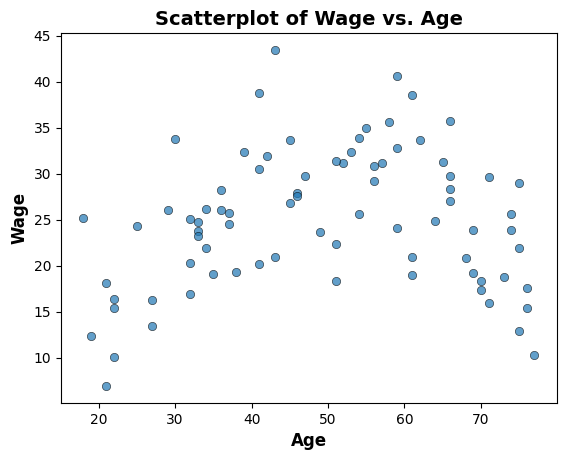

In [6]:
# Part 1a)

# Plotting 'Wage' vs. 'Age' in a scatterplot
sns.scatterplot(x = wages['Age'], y = wages['Wage'], edgecolor = 'black', alpha = .7)
plt.title('Scatterplot of Wage vs. Age', fontsize = 14, weight = 'bold')
plt.ylabel('Wage', fontsize = 12, weight = 'bold')
plt.xlabel('Age', fontsize = 12, weight = 'bold')
plt.show()

#The relationship does not appear to be linear and seems to appear to have a quadratic shape

In [7]:
# Part 1b)

# Fitting a MLR model that regresses 'Wage' on 'Age' and 'Educ' assuming a linear relationship
model1 = smf.ols('Wage ~ Age + Educ', data = wages).fit()

model1.summary()

# Adjusted R squared of .609
# 'Educ' significant at the 5% level of significance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     62.47
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           7.57e-17
Time:                        22:05:21   Log-Likelihood:                -235.42
No. Observations:                  80   AIC:                             476.8
Df Residuals:                      77   BIC:                             484.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6381      2.366      1.115      0.268      -2.074       7.350
Age            0.0472      0.031      1.541      0.127      -0.014       0.108
Educ           1.4410      0.131     10.981      0.000       1.180       1.702
==============================================================================
Omnibus:                        1.999   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.721
Skew:                          -0.359   Prob(JB):                        0.423
Kurtosis:                       2.977   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Part 1c)

# Fitting a MLR model that now incorporates a quadratic relationship between 'Wage' and 'Age'
model2 = smf.ols('Wage ~ Age + I(Age**2) + Educ', data = wages).fit()

model2.summary()

# Adjusted R squared of .826
# All independent variables signficant at the 5% level of significance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     125.7
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           2.18e-29
Time:                        22:05:21   Log-Likelihood:                -202.56
No. Observations:                  80   AIC:                             413.1
Df Residuals:                      76   BIC:                             422.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.7219      3.023     -7.517      0.000     -28.742     -16.701
Age             1.3500      0.134     10.077      0.000       1.083       1.617
I(Age ** 2)    -0.0133      0.001     -9.840      0.000      -0.016      -0.011
Educ            1.2540      0.090     13.990      0.000       1.075       1.432
==============================================================================
Omnibus:                        3.000   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.884
Skew:                           0.031   Prob(JB):                        0.236
Kurtosis:                       3.928   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

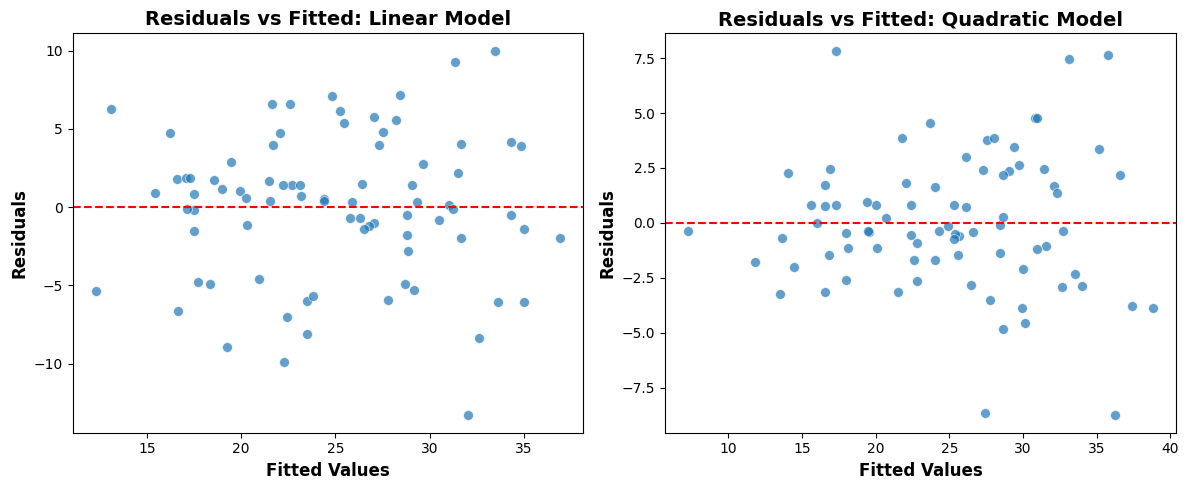

In [9]:
# Part 1c)

# Displaying RVF plots of the linear model and the quadratic model
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.scatterplot(x = model1.fittedvalues, y = model1.resid, alpha = .7, s = 50, ax = axes[0])
axes[0].axhline(0, color = 'red', linestyle = '--')
axes[0].set_title('Residuals vs Fitted: Linear Model', fontsize = 14, weight = 'bold')
axes[0].set_ylabel('Residuals', fontsize = 12, weight = 'bold')
axes[0].set_xlabel('Fitted Values', fontsize = 12, weight = 'bold')

sns.scatterplot(x = model2.fittedvalues, y = model2.resid, alpha = .7, s = 50, ax = axes[1])
axes[1].axhline(0, color = 'red', linestyle = '--')
axes[1].set_title('Residuals vs Fitted: Quadratic Model', fontsize = 14, weight = 'bold')
axes[1].set_ylabel('Residuals', fontsize = 12, weight = 'bold')
axes[1].set_xlabel('Fitted Values', fontsize = 12, weight = 'bold')

plt.tight_layout()
plt.show()


In [10]:
# Part 1d)

# Creating new data to make predictions 
new_data = pd.DataFrame({
    'Age': [30, 50, 70],    
    'Educ': [16, 16, 16]    
})

new_data['Age**2'] = new_data['Age'] ** 2

new_data.head()

,Age,Educ,Age**2
0,30,16,900
1,50,16,2500
2,70,16,4900


In [11]:
# Part 1d)

# Making predictions for the new data using the quadratic model
preds = model2.predict(new_data).round(1)

for age, pred in zip(new_data['Age'], preds):
    print(f'The predicted wage for someone that is {age} years old with 16 years of education is {pred}')

The predicted wage for someone that is 30 years old with 16 years of education is 25.9
The predicted wage for someone that is 50 years old with 16 years of education is 31.5
The predicted wage for someone that is 70 years old with 16 years of education is 26.6


# Question 1 Answers:
- ### Part a:
  - Due to the u-shape in the graph, a quadratic fit wouold likely be the most appropriate.
- ### Part b:
  - The linear model took the form of, $\hat{Wage} = \hat{B}_0 + \hat{B}_1(Age) + \hat{B}_2(Educ)$
- ### Part c:
  - The quadratic model took the form of, $\hat{Wage} = \hat{B}_0 + \hat{B}_1(Age) + \hat{B}_2(Age^2) + \hat{B}_3(Educ)$
  - After observing the RVF plots, the quadratic model ensured that the residuals were homoskedastic.
  - Adjusted $R^2$ of the linear model: $.609$
  - Adjusted $R^2$ of the quadratic model: $.826$
  - The quadratic model proved to be the more appropriate model.
- ### Part d:
  - Predicted hourly wage of someone who is $30$ years old with $16$ years education: $25.9$
  - Predicted hourly wage of someone who is $50$ years old with $16$ years education: $31.5$
  - Predicted hourly wage of someone who is $70$ years old with $16$ years education: $26.6$
- ### Part e:
  - You will receive the highest wages at the age of 50, having 16 years of education.

# Question 2:

In [14]:
# Loading in the csv file as a dataframe
annarbor = pd.read_csv('/Users/jackewings/Desktop/QMBE_3730_Jack_Ewings_2025/CSVFiles/AnnArbor.csv')

annarbor.head()

,Rent,Beds,Baths,Sqft
0,645,1,1.0,500
1,675,1,1.0,648
2,760,1,1.0,700
3,800,1,1.0,903
4,820,1,1.0,817


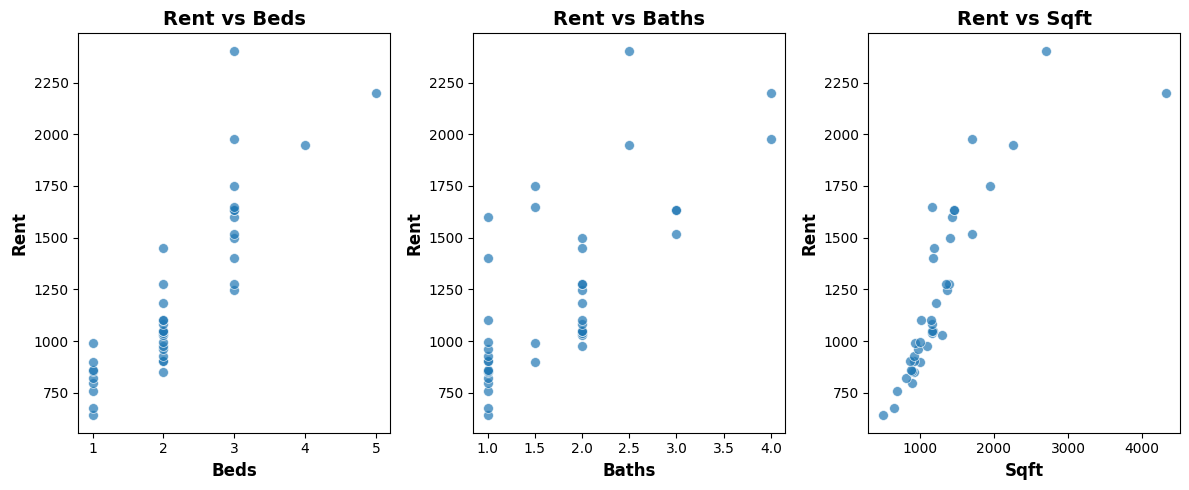

In [15]:
# Part 2a)

# Plotting 'Rent' vs. each of the independent variables
fig, axes = plt.subplots(1, 3, figsize = (12, 5))

sns.scatterplot(x = annarbor['Beds'], y = annarbor['Rent'], alpha = .7, s = 50, ax = axes[0])
axes[0].set_title('Rent vs Beds', fontsize = 14, weight = 'bold')
axes[0].set_ylabel('Rent', fontsize = 12, weight = 'bold')
axes[0].set_xlabel('Beds', fontsize = 12, weight = 'bold')

sns.scatterplot(x = annarbor['Baths'], y = annarbor['Rent'], alpha = .7, s = 50, ax = axes[1])
axes[1].set_title('Rent vs Baths', fontsize = 14, weight = 'bold')
axes[1].set_ylabel('Rent', fontsize = 12, weight = 'bold')
axes[1].set_xlabel('Baths', fontsize = 12, weight = 'bold')

sns.scatterplot(x = annarbor['Sqft'], y = annarbor['Rent'], alpha = .7, s = 50, ax = axes[2])
axes[2].set_title('Rent vs Sqft', fontsize = 14, weight = 'bold')
axes[2].set_ylabel('Rent', fontsize = 12, weight = 'bold')
axes[2].set_xlabel('Sqft', fontsize = 12, weight = 'bold')

plt.tight_layout()
plt.show()

In [16]:
# Part b)

# Creating a MLR model that regresses 'Rent' on 'Beds', 'Baths', and 'log(Sqft)'
model3 = smf.ols('Rent ~ Beds + Baths + I(np.log(Sqft))', data=annarbor).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     67.05
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           8.29e-15
Time:                        22:05:22   Log-Likelihood:                -260.61
No. Observations:                  40   AIC:                             529.2
Df Residuals:                      36   BIC:                             536.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3909.7415   1053.792     -3.710      0.001   -6046.931   -1772.552
Beds              131.7781     61.681      2.136      0.040       6.683     256.874
Baths              36.4255     52.678      0.691      0.494     -70.411     143.262
I(np.log(Sqft))   675.2648    169.405      3.986      0.000     331.695    1018.835
==============================================================================
Omnibus:                        6.206   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.831
Skew:                           0.740   Prob(JB):                       0.0893
Kurtosis:                       3.843   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Part b)

# Creating new data for the prediction
new_data2 = pd.DataFrame({
    'Beds': [3],
    'Baths': [2],
    'Sqft': [1600]
})

new_data2.head()

,Beds,Baths,Sqft
0,3,2,1600


In [18]:
# Part b)

# Predicting the rent for a house using the new data
preds2 = model3.predict(new_data2)

for pred in preds2:
    print(f'The predicted rent is ${pred:.2f}')

The predicted rent is $1540.38


# Question 2 Answers:
- ### Part a:
  - None of the independent variables indicate a severely non-linear relationship with **Rent**.
  - The variable **Sqft** could potentially benefit from a log transformation but it is not obvious.
- ### Part b:
  - The predicted rent for a $1600$ sqft house with $3$ bedrooms and $2$ bathrooms is about $\$1548.21$